<center>
        <h1>
            <b>COMPUTER CLASS PROJECT ENSAI</b>
        </h1>
        <b><u>Author:</u></b> Serge Cliver KANA
</center>

<center><b><h1>Introduction</h1></center> </b>  
<p align="justify">For a data scientist, a robust understanding of both Machine Learning theory and proficiency in Python is indispensable. The latter serves as the gateway to implementing learning algorithms in one of the most widely utilized programming languages. This project was dedicated to precisely this pursuit.

Given that computation time plays a pivotal role in any statistical or machine learning algorithm executed on a computer, we prioritized code optimization for speed. Techniques like leveraging matrix operations over loops were employed to enhance efficiency. This endeavor yielded impressive results, with execution times consistently below <b>20</b> seconds in most cases.

Moreover, we ensured code <b>reproducibility</b>, ensuring that our diverse interpretations of results remain consistent across numerous runs. This meticulous approach enhances the reliability and credibility of our findings.</p>

In [276]:
#Necessary imports
%pip install ucimlrepo
%pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings("ignore")


**(Q1)** Develop a Monte Carlo algorithm to estimate $ \int_{0}^{1} \int_{0}^{1} f(x_{1} , x_{2}) dx_{1} dx_{2} $ .Illustrate your algorithm on
$f(x_{1} , x_{2}) = x_{1} + x_{2}$ as well as $f(x_{1} , x_{2}) = x_{1}x_{2}$. The rate of convergence with respect to the
number of evaluation, say n, of f , should be illustrated as well as the level of uncertainty.

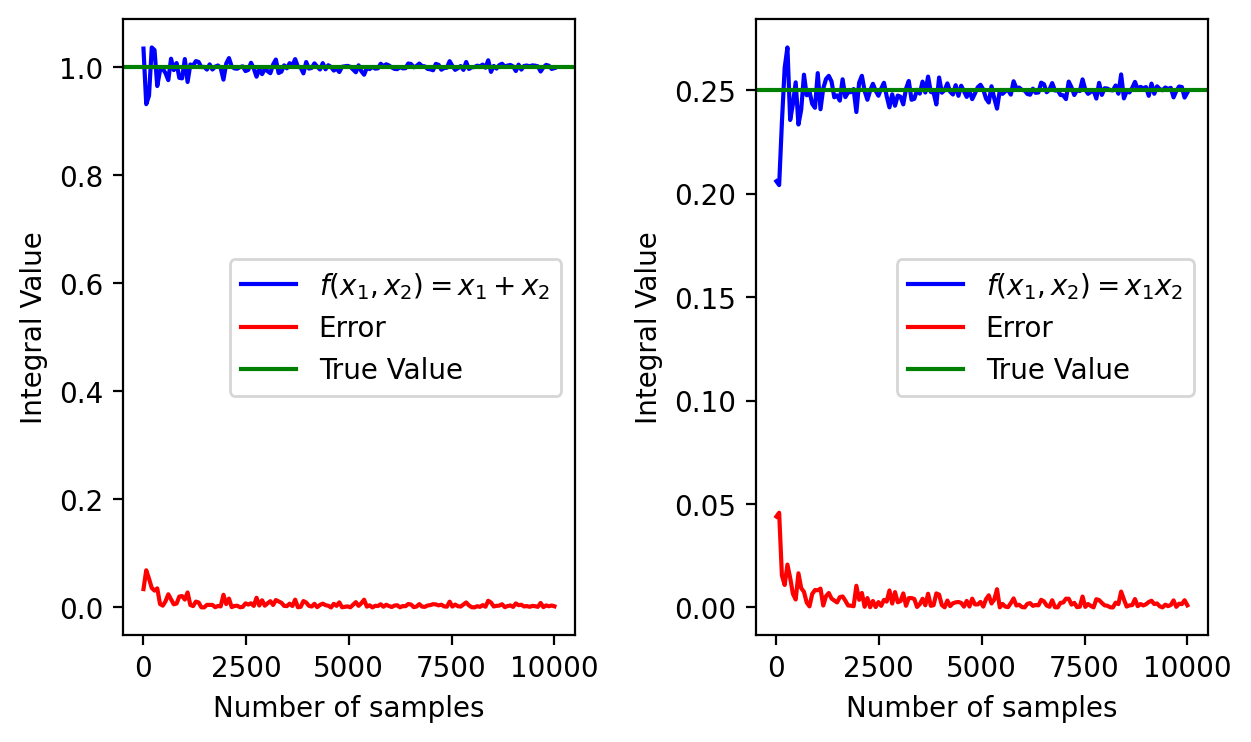

In [277]:
def mc_db_integral(n, func, a=0, b=1, c=0, d=1):
    """
    Estimate a double integral using Monte Carlo approximation.

    Args:
        n (int): Number of random samples.
        func (callable): Function to be integrated.
        a (float, optional): Lower bound of the first integral. Default is 0.
        b (float, optional): Upper bound of the first integral. Default is 1.
        c (float, optional): Lower bound of the second integral. Default is 0.
        d (float, optional): Upper bound of the second integral. Default is 1.

    Returns:
        float: Estimated value of the double integral.

    This function employs Monte Carlo approximation to compute a double integral for a specified function
    within a defined area. It generates 'n' random samples and computes the average value of 'func' over
    the sampled points, which is then multiplied by the area of the specified region.
    """
    np.random.seed(n)
    x1 = np.random.uniform(a, b, size=n)
    x2 = np.random.uniform(c, d, size=n)
    area = (b - a) * (d - c)
    result = area * np.mean(np.vectorize(func)(x1, x2))
    return result


def f1(x1, x2):
    """This is the 1st function in which we're interested computing the integral"""
    return x1 + x2

def f2(x1, x2):
    """This is the 2nd function in which we're interested computing the integral"""
    return x1 * x2

#generate the number of samples n
n = np.linspace(start=10,stop=10000,num=150,dtype=np.int64)

#compute the 1st monte carlo estimate
If1 = np.vectorize(mc_db_integral)(n, f1)

# absolute error we make for each estimation compared to ground truth value of the integral
err1 = np.abs(If1 - 1)

#compute the 2nd monte carlo estimate
If2 = np.vectorize(mc_db_integral)(n, f2)

# absolute error we make for each estimation compared to ground truth value of the integral
err2 = np.abs(If2 - 1/4)

# plotting the results
plt.figure(figsize=(7, 4), dpi=200)
plt.title("Monte Carlo Integration")
plt.subplot(121)
plt.plot(n, If1, color="b", label="$f(x_{1},x_{2}) = x_{1} + x_{2}$")
plt.plot(n, err1, color="r", label="Error")
plt.axhline(y=1, color="g", label="True Value")
plt.xlabel("Number of samples")
plt.ylabel("Integral Value")
plt.legend()
plt.subplot(122)
plt.plot(n, If2, color="b", label="$f(x_{1},x_{2}) = x_{1}x_{2}$")
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(n, err2, color="r", label="Error")
plt.axhline(y=1/4, color="g", label="True Value")
plt.xlabel("Number of samples")
plt.ylabel("Integral Value")
plt.legend()
plt.show()


**$\underline{Comment}$:** We can clear show that as n increases, the estimated integral goes closer to the ground truth **(curve in green)** and the error descreases **(curve in red)** to zero

**(Q2)** Generate 1000 independent Gaussian vectors $(X_{i})_{i=1,...,1000}$ , each having dimension $p = 400$, $mean=
0$ and covariance the identity matrix. Give an estimate of the covariance matrix as well as a plot
of the associated eigenvalues.

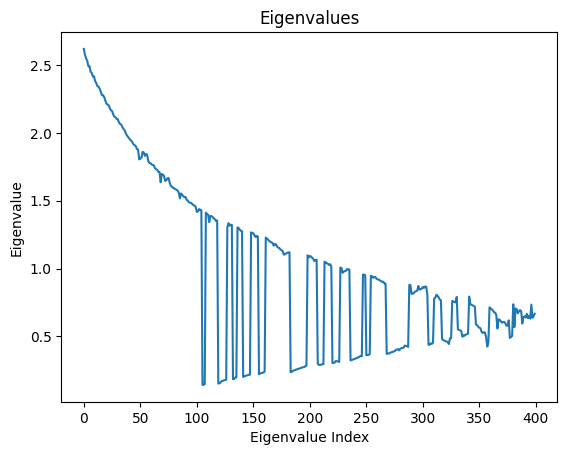

The generated X has the following shape: (1000, 400).


In [278]:
n, p = 1000, 400

# We fixed the seed for result reproducibility
np.random.seed(n)

# Generate identity matrix of size (n)
cov = np.identity(n)

# Generate a vector of zeros of size (n)
mean = np.zeros(n)

# Generate the matrix X of n independent vectors, X is of size (n,p)
X = np.random.multivariate_normal(mean=mean, cov=cov, size=p).T

# Compute the estimated covariance matrix
cov_estimated = np.cov(X, rowvar=False)

# Compute the associated eigenvalues
eigen_values = np.linalg.eigvals(cov_estimated)

# Plot the eigenvalues
plt.plot(eigen_values)
plt.title("Eigenvalues")
plt.xlabel("Eigenvalue Index")
plt.ylabel("Eigenvalue")
plt.show()

print(f"The generated X has the following shape: \033[1m{X.shape}\033[0m.")


**(Q3)** Using the covariates generated previously, generate a multi-task classification dataset with 3 labels:
1, 2, 3 such that for each $i = 1, . . . , 1000$, \\
$P(Y_{i} = 1) = \frac{exp(X_{i}^{T}β_{1})}{(1+exp(X_{i}^{T}β_{1})+exp(X_{i}^{T}β_{2} ))}$ \\
$P(Y_{i} = 2) = \frac{exp(X_{i}^{T}β_{2} )}{(1+exp(X_{i}^{T}β_{1})+exp(X_{i}^{T}β_{2} ))}$ with $β_{1} = (1, 0, . . . , 0)$, $β_{2} = (0, 1, 0, . . . , 0) $. \\
Note that $P (Y_{i} = 3)$ is given by $1 − P (Y_{i} = 1) − P (Y_{i} = 2)$.

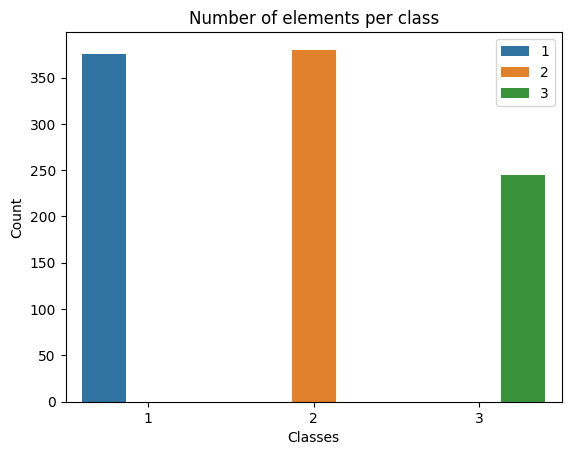

In [279]:
β1, β2 = np.zeros(p), np.zeros(p)
β1[0] = 1
β2[1] = 1


def proba_2_y(py1, py2, py3):
    """
    Convert probabilities to predicted class.

    Args:
        py1 (float): Probability of y being of class 1.
        py2 (float): Probability of  y being of class 2.
        py3 (float): Probability of  y being of class 3.

    Returns:
        int: Predicted class (1, 2, or 3)
    e.g if (0.5,0.1,0.2) the output will be -> 1 = np.argmax((0.5,0.1,0.2)) + 1 =  0 + 1.
    """
    probs = (py1, py2, py3)
    return np.argmax(probs) + 1


#now we compute the probabilities pi
denominator = 1 + np.exp(np.matmul(X,β1)) + np.exp(np.matmul(X,β2))
p1 = np.exp(np.matmul(X,β1)) / denominator
p2 = np.exp(np.matmul(X,β2)) / denominator
p3 = 1 - p2 - p1

#given the probabilities we generate the associated labels given the probabilities
Y = np.vectorize(proba_2_y) (p1,p2,p3)

#plot the class count
sns.countplot(x=Y,hue=Y,palette="tab10")
plt.ylabel("Count")
plt.xlabel("Classes")
plt.title("Number of elements per class")
plt.show()

**$\underline{Comment}$: We can see that the data is imbalanced, with much less samples from class 3**

**(Q4)** (no package here apart from the basics like numpy) Write the risk function following from the MLE
as well as its gradient. Write a program/function to compute the gradient at a given point (which
would be an input of the program).

The multiclass logistic regression model can be expressed by the following equation :
$$h(x_{i},\beta) = P(Y_{i}=j / x_{i};\beta)= \frac{1}{1+ \sum_{j=1}^{2} \exp{\beta_{j}^{T}X_{i}}} \exp^{\beta^{T}_{j}X_{i}}   $$         
We should find the optimal parmeters $\beta_{j \in (1,2)}$ in our case, $\beta_{3} =(0,0,...0) $ so as to minimize the following risk function:
$$
\begin{align}
\hat{R(\beta)} =  -\frac{1}{n} \sum_{i=1}^{n} \mathbb{1}_{\{Y_{i}=1\}} .log(P(Y_{i}=1 / x_{i};\beta)) + \mathbb{1}_{\{Y_{i}=2\}} .log(P(Y_{i}=2 / x_{i};\beta)) + \mathbb{1}_{\{Y_{i}=3\}} .log(P(Y_{i}=3 / x_{i};\beta)) \\
\hat{R(\beta)} = - \frac{1}{n} \sum_{i=1}^{n} \mathbb{1}_{\{Y_{i}=1\}} .log(\frac{\exp{\beta_{1}^{T}x_{i}}}{1+ \sum_{j=1}^{2}\exp{\beta_{j}^{T}x_{i}}}) + \mathbb{1}_{\{Y_{i}=2\}} .log(\frac{\exp{\beta_{2}^{T}x_{i}}}{1+ \sum_{j=1}^{2}\exp{\beta_{j}^{T}x_{i}}}) + \mathbb{1}_{\{Y_{i}=3\}} .log(\frac{1}{1+ \sum_{j=1}^{2}\exp{\beta_{j}^{T}x_{i}}})
\end{align}
$$

The associated gradient can be obtained by computing the partial derivate of $\hat{R(\beta)}$ with respect to $\beta_{1}$ and $\beta_{2}$ and we obtain the following gradient:

$$
\nabla R(\beta_{1}, \beta_{2})= -\frac {1}{n}\left[\begin{array}{c}
\sum_{i=1}^{n} x_{i} . ( \mathbb{1}_{\{Y_{i}=1\}} - h(x_{i},\beta_{1}))\\
\sum_{i=1}^{n}  x_{i} . ( \mathbb{1}_{\{Y_{i}=2\}} - h(x_{i},\beta_{2}))\\
\end{array}\right]
$$

**Comment:** We take the average of the gradient with respect to the number of samples. This practice helps to stabilize the learning process and reduce the impact of the training set size on the learning rate.



In [280]:

def indicator(Y, label):
    """
    Generate an indicator vector based on true labels.

    Args:
        Y (numpy.ndarray): True labels of shape (n_samples,).
        label (int): Label for which the indicator is generated.

    Returns:
        numpy.ndarray: Indicator vector of shape (n_samples,) of 1 and 0.

    This function assigns a value of 1 if yi == label else 0 otherwise.
    """
    return np.vectorize(lambda y: label if y == label else 0)(Y)

def gradient(X, Y, β1, β2):
    """
    Compute the full gradient for mulitnomial logistic regression.

    Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        Y (numpy.ndarray): Target vector of shape (n_samples,).
        β1 (numpy.ndarray): Coefficients for class 1.
        β2 (numpy.ndarray): Coefficients for class 2.

    Returns:
        tuple: Tuple containing the gradients grad1 and grad2 with respect to β1 and β2, both of shape (n_features,).

    The function computes the gradients for logistic regression using matrix operations instead of for loops
    to save computation time.
    """
    # Function implementation here
    denominator = 1 + np.exp(np.matmul(X, β1)) + np.exp(np.matmul(X, β2))
    h1 = np.exp(np.matmul(X, β1)) / denominator
    h2 = np.exp(np.matmul(X, β2)) / denominator
    Ind1, Ind2 = indicator(Y, 1), indicator(Y, 2)
    grad1 = - (1 / X.shape[1]) * np.matmul((Ind1 - h1).T, X)
    grad2 = - (1 / X.shape[1]) * np.matmul((Ind2 - h2).T, X)
    return grad1, grad2


**(Q5)** (no package here apart from the basics like numpy) Write a program/function to compute stochastic
version of the gradient at a given point (which would be an input of the program). Explain carefully
how you generate the stochastic gradient before giving the program.


$\underline{Explanation}$:
<p align="justify">In standard batch gradient descent, calculating the gradient over the entire dataset before updating the coefficients can be computationally demanding. This is where stochastic gradient descent (SGD) comes into play. SGD randomly selects a sample, denoted as $X_{i}$, from the dataset using a uniform distribution. This means every sample has an equal chance of being chosen for gradient computation. The coefficients are then updated based on this sampled gradient.</p>

In [281]:
def stochastic_gradient(X, Y, β1, β2, m=1, seed=1000):
    """
    Calculate the stochastic gradient for logistic regression.

    Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        Y (numpy.ndarray): Target vector of shape (n_samples,).
        β1 (numpy.ndarray): Coefficient vector of shape (n_features,).
        β2 (numpy.ndarray): Coefficient vector of shape (n_features,).
        m (int, optional): Number of random samples for each iteration. Default is 1.
        seed (int, optional): Seed for reproducibility. Default is 1000 (but it will be given at
        each iteration of SGD).

    Returns:
        tuple: Tuple containing the gradients relative to β1 and β2.

    This function computes the stochastic gradient for logistic regression using randomly sampled data.

    Example Usage:
        >>> grad1, grad2 = stochastic_gradient(X, Y, β1, β2, m=1, seed=1000)
    """
    # function implementation here
    # for reproducibility
    np.random.seed(seed)
    rand_index = np.random.choice(X.shape[0], size=m)
    x_rand = X[rand_index]
    y_rand = Y[rand_index]
    denominator = 1 + np.exp(np.matmul(x_rand, β1)) + np.exp(np.matmul(x_rand, β2))
    h1 = np.exp(np.matmul(x_rand, β1)) / denominator
    h2 = np.exp(np.matmul(x_rand, β2)) / denominator
    Ind1, Ind2 = indicator(y_rand, 1), indicator(y_rand, 2)
    grad1 = - (1 / x_rand.shape[1]) * np.matmul((Ind1 - h1).T, x_rand)
    grad2 = - (1 / x_rand.shape[1]) * np.matmul((Ind2 - h2).T, x_rand)
    return grad1, grad2



**(Q6)** (no package here apart from the basics like numpy) Write a program to evaluate the performance
of a given set of vectors (β1, β2) on the previous problem. Explain carefully the idea you follow to
evaluate the performance and why this is reliable.

<p align="justify">In the preceding questions, we calculated both the gradient and stochastic gradient pertaining to a specific risk function with the aim of minimizing it. The minimization of this risk function essentially entails determining the optimal values of $\beta_{1}$ and  $\beta_{2}$. The upcoming function is significant for the following reasons:
* It offers insights into the convergence behavior of our gradient descent algorithm
* We can conveniently visualize its value as the gradient descent algorithm progresses.

**Furthermore**, we can define an accuracy function, which provides **a more intuitive overview** of our model's performance. </p>

In [282]:
def log_risk(X,Y,β1, β2):
  """
  Calculate the log-likelihood risk for logistic regression.

    Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        Y (numpy.ndarray): Target vector of shape (n_samples,).
        β1 (numpy.ndarray): Coefficients for class 1.
        β2 (numpy.ndarray): Coefficients for class 2.

    Returns:
        float: Log-likelihood risk.
  """
  log_denominator = np.log(1 + np.exp(np.matmul(X, β1)) + np.exp(np.matmul(X, β2)))
  logr = - np.mean(indicator(Y,1) * (np.matmul(X, β1) -  log_denominator)
         +  indicator(Y,2) * (np.matmul(X, β2) - log_denominator)
         - indicator(Y,3) * (log_denominator) )
  return logr

def accuracy(X, Y, β1, β2):
    """
    Calculates the accuracy of a multi-class classification model.
    Args:
    X (numpy.ndarray): Feature matrix (shape: [n_samples, n_features]).
    Y (numpy.ndarray): True class labels (shape: [n_samples]).
    β1 (numpy.ndarray): Best Coefficient for class 1 found by the gradient descent (shape: [n_features]).
    β2 (numpy.ndarray): Best Coefficient for class 2 found by the gradient descent (shape: [n_features]).
    Returns:
    float: Accuracy score.
    """
    denominator = 1 + np.exp(np.matmul(X, β1)) + np.exp(np.matmul(X, β2))
    py1 = np.exp(np.matmul(X, β1)) / denominator
    py2 = np.exp(np.matmul(X, β2)) / denominator
    py3 = 1 - py1 - py2
    Y_pred = np.vectorize(proba_2_y)(py1, py2, py3)
    acc = np.mean(Y_pred == Y)
    return acc


**(Q7)** (no package here apart from the basics like numpy) Run GD and SGD for initial vector (0, . . . , 0)
and different step sizes and compare them based on the program developed before.

<p align="justify">As it is customary in machine learning, prior to training any learning algorithm, it is standard practice to partition the dataset into two subsets: <b>the training set (typically 70%) and the test set (usually 30%)</b>.</p>
<b>Data division</b>

In [283]:
def data_split(X, Y, split_size=0.7, seed=1000):
    """
    Split the dataset into training and test sets.

    Parameters:
        X (numpy.ndarray): Input features.
        Y (numpy.ndarray): Target labels.
        split_size (float): Proportion of the dataset to include in the training set.
        seed (int): Seed for random number generation.
    Returns:
        tuple: x_train (numpy.ndarray), y_train (numpy.ndarray), x_test (numpy.ndarray), y_test (numpy.ndarray)
    """
    np.random.seed(seed)
    n = X.shape[0]
    indexes_train = np.random.choice(n, replace=False, size=int(n * split_size))
    indexes_test = np.setdiff1d(np.arange(n), indexes_train)
    x_train = X[indexes_train]
    y_train = Y[indexes_train]
    x_test = X[indexes_test]
    y_test = Y[indexes_test]
    return x_train, y_train, x_test, y_test



In [284]:
#now let's call the function we've just created to split the data
x_train, y_train, x_test, y_test = data_split(X, Y, split_size=0.7, seed=n)

**Full gradient version**

In [285]:
def gradient_descent(X,Y,conv_thres=10e-5,step_size=0.0001):
  """
    Perform full gradient descent for multinomial logistic regression.
    Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features), here (1000,400).
        Y (numpy.ndarray): Target vector of shape (n_samples,) here (1000,).
        conv_thres (float, optional): Convergence threshold. Default is 10e-5.
        step_size (float, optional): Step size for updating weights. Default is 0.0001.
        p (int, optional): Number of features. Default is 400.
    Returns:
        tuple: Tuple containing the learned coefficients β1 and β2 of size (n_features,), and a list of log-likelihood values.

    The function performs stochastic gradient descent to learn the coefficients β1 and β2 for logistic regression.
    It iterates until the change in log-likelihood falls below the convergence threshold.

    Example Usage:
        >>> X = np.array([[1, 2], [3, 4], [5, 6]])
        >>> Y = np.array([0, 1, 0])
        >>> beta1, beta2, log_likelihoods = gradient_descent(X, Y)
    """
  t1 = time.time()
  p = X.shape[1]
  β1, β2 = np.zeros(p), np.zeros(p) #initialize the coefficients to zero
  prev_logr = np.inf  #set the prev_conp.float('inf')st
  logr_list = np.array([])
  iteration = 1
  while True :
        #compute the gradient
        g1, g2 = gradient(X,Y,β1, β2)
        #update the weights
        β1 -= step_size * g1
        β2 -= step_size * g2
        #compute the current log_risk
        current_logr = log_risk(X,Y,β1, β2)
        #append the log_risk to the list of risks
        logr_list = np.append(logr_list,current_logr)
        if np.abs(current_logr - prev_logr) < conv_thres:
          print(f"Convergence reached after \033[1m{iteration}  iterations\033[0m for \033[1mstep_size = {step_size} \033[0m and took \033[1m{time.time() - t1} seconds\033[0m")
          break
        prev_logr = current_logr
        iteration = iteration + 1
  return  β1, β2, logr_list

**Now we are going to train our gradient descent for many step_sizes and observe the log_risk**

Convergence reached after 69  iterations for step_size = 0.1  and took 0.2033705711364746 seconds
Convergence reached after 570  iterations for step_size = 0.01  and took 1.9124956130981445 seconds
Convergence reached after 2541  iterations for step_size = 0.001  and took 19.33919858932495 seconds


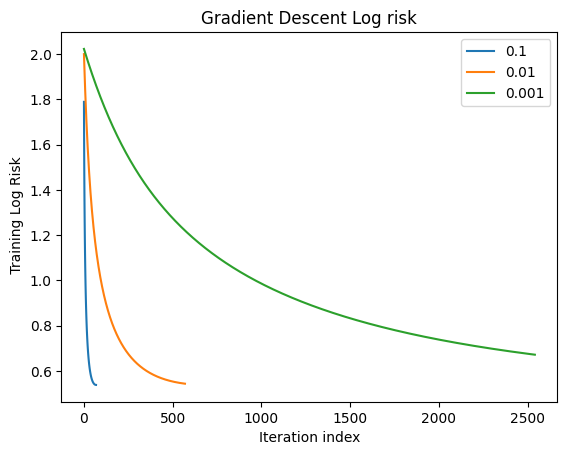

In [286]:

step_sizes = [1e-1,1e-2,1e-3]
results = {}
for step_size in step_sizes:
  β1, β2, logr_list =  gradient_descent(x_train,y_train,conv_thres=10e-5,step_size=step_size)
  results[step_size] = [β1, β2, logr_list]
  x, y = np.arange(len(results[step_size][2])), results[step_size][2]
  plt.plot(x,y)
  #plt.plot(x[-1],y[-1],marker="o")
  #plt.annotate("l_log_risk",(x[-1],y[-1]))
plt.xlabel("Iteration index")
plt.ylabel(" Training Log Risk")
plt.title("Gradient Descent Log risk")
plt.legend(step_sizes)
plt.show()


 **$\underline{Comment}$:**
 <p align="justify"> We can deduce that there exists an inverse relationship between the step size and the number of iterations needed for our algorithm to converge. Additionally, when the step size is excessively low **(e.g: 0.0001)**, the algorithm converges, albeit without attaining the minimum. </p>




**Now, from the three estimators we've constructed, we select the one that produced the lowest log-likelihood risk.**

In [287]:
β1, β2, risk = min(sorted(results.items(),key=lambda x:x[1][-1][-1]))[1]
print(f"The lowest training  \033[1m log risk  \033[0m for GD is :  \033[1m{risk[-1]} \033[0m")
print(f"The log risk on the test set for GD is :  \033[1m {log_risk(x_test,y_test,β1, β2 )} \033[0m")
print(f"The training \033[1m accuracy = {accuracy(x_train,y_train,β1, β2)*100} % \033[0m")
print(f"The test  \033[1m accuracy = {accuracy(x_test,y_test,β1, β2)*100} % \033[0m")


The lowest training   log risk   for GD is :  0.6717098498444264 
The log risk on the test set for GD is :   1.742398948199138 
The training  accuracy = 92.57142857142857 % 
The test   accuracy = 64.66666666666666 % 


**Stochastic Version**

In [288]:
def stochastic_gradient_descent(X,Y,conv_thres=10e-5,step_size=0.001,m=1):
  """
    Perform stochastic gradient descent for logistic regression.

    Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        Y (numpy.ndarray): Target vector of shape (n_samples,).
        conv_thres (float, optional): Convergence threshold. Default is 10e-5.
        step_size (float, optional): Step size for updating weights. Default is 0.001.
        p (int, optional): Number of features. Default is 400.
        m (int, optional): Number of random samples for each iteration. Default is 1.
    Returns:
        tuple: Tuple containing the learned coefficients β1 and β2, and a list of log-likelihood values.

    The function performs stochastic gradient descent to learn the coefficients β1 and β2 for logistic regression.
    It iterates until the change in log-likelihood falls below the convergence threshold.

    Example Usage:
        >>> X = np.array([[1, 2], [3, 4], [5, 6]])
        >>> Y = np.array([0, 1, 0])
        >>> beta1, beta2, log_likelihoods = stochastic_gradient_descent(X, Y)
    """
  t1 = time.time()
  p = X.shape[1]
  β1, β2 = np.zeros(p), np.zeros(p) #initialize the coefficients to zero
  prev_logr = np.inf  #set the prev_conp.float('inf')st
  logr_list = np.array([])
  iteration = 1
  #np.random.seed(n)
  #print(f"Training process started for {num_inter} iterations")
  while True :

        #np.random.seed(iteration)
        #compute the gradient
        g1, g2 = stochastic_gradient(X,Y,β1, β2,m=m,seed=iteration)
        #update the weights
        β1 -= step_size * g1
        β2 -= step_size * g2
        #compute the current log_risk
        current_logr = log_risk(X,Y,β1, β2)
        #append the log_risk to the list of risks
        logr_list = np.append(logr_list,current_logr)
        if np.abs(current_logr - prev_logr) < conv_thres  :
          print(f"Convergence reached after \033[1m{iteration}  iterations\033[0m for \033[1mstep_size = {step_size} \033[0m and took \033[1m{time.time() - t1} seconds\033[0m")
          break
        prev_logr = current_logr
        iteration += 1
  return  β1, β2, logr_list


**Now we are going to train our stochastic gradient descent for many step_sizes and observe the log_risk**

Convergence reached after 56  iterations for step_size = 0.85  and took 0.4145472049713135 seconds
Convergence reached after 49  iterations for step_size = 0.9  and took 0.40245771408081055 seconds
Convergence reached after 41  iterations for step_size = 0.99  and took 0.3809330463409424 seconds


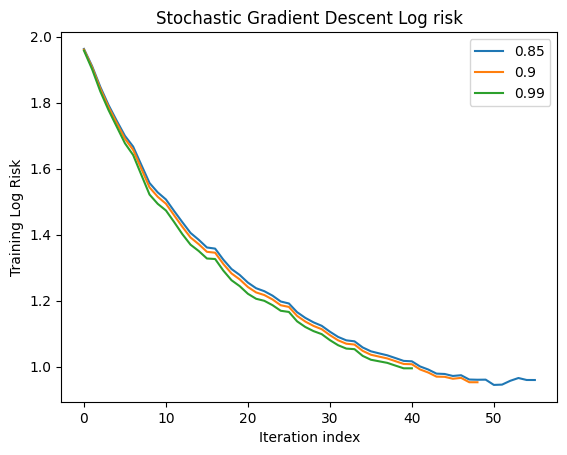

In [289]:
step_sizes =  [0.85,0.9,0.99]
results = {}
for step_size in step_sizes:
  β1, β2, logr_list =  stochastic_gradient_descent(x_train,y_train,step_size=step_size,m=30)
  results [step_size] = [β1, β2, logr_list]
  x, y = np.arange(len(results[step_size][2])), results[step_size][2]
  plt.plot(x,y)
  #plt.plot(x[-1],y[-1],marker='o')
plt.xlabel("Iteration index")
plt.ylabel("Training Log Risk")
plt.title("Stochastic Gradient Descent Log risk")
plt.legend(step_sizes);

In [290]:
β1, β2, risk = min(sorted(results.items(),key=lambda x:x[1][-1][-1]))[1]
print(f"The lowest training risk is :  \033[1m {risk[-1]}  \033[0m")
print(f"The log risk on the test set for SGD is :  \033[1m {log_risk(x_test,y_test,β1, β2 )}  \033[0m")
print(f"The training  \033[1m accuracy = {accuracy(x_train,y_train,β1, β2)*100} %  \033[0m")
print(f"The test  \033[1m accuracy = {accuracy(x_test,y_test,β1, β2)*100} %  \033[0m")


The lowest training risk is :   0.9592686027972107  
The log risk on the test set for SGD is :   2.0368835918272215  
The training   accuracy = 82.0 %  
The test   accuracy = 61.66666666666667 %  


**$\underline{Comment}$:**
<p align="justify"> As anticipated, the learning curve for Stochastic Gradient (SG) appears more erratic, attributed to the utilization of only <b>m=30</b> random samples from the training set for coefficient updates at each step. <b>Nevertheless, it's noteworthy that SG exhibits a much quicker convergence, requiring fewer iterations and less training time compared to the full gradient approach.</b>
</p>



**(Q8)** Using scikitlearn, compute directly the estimate using $l_{1}$ penalization. And compare to your
approach.


In [291]:
from sklearn.linear_model import LogisticRegression
estimate = LogisticRegression(penalty='l1',tol=10e-5,fit_intercept=False,random_state=0,multi_class='multinomial',solver="saga")
estimate.fit(x_train,y_train)
β1, β2 = estimate.coef_[0],estimate.coef_[1]

In [292]:
print(f"The lowest training log risk for sklearn is :  \033[1m {log_risk(x_train,y_train,β1, β2 )}  \033[0m")
print(f"The log risk on the test set for sklearn is :  \033[1m {log_risk(x_test,y_test,β1, β2 )}  \033[0m")
print(f"The training accuracy for sklearn is  \033[1m accuracy = {accuracy(x_train,y_train,β1, β2)*100} %  \033[0m")
print(f"The test accuracy for sklearn is  \033[1m accuracy = {accuracy(x_test,y_test,β1, β2)*100} %  \033[0m")

The lowest training log risk for sklearn is :   0.5581240648439387  
The log risk on the test set for sklearn is :   1.1617362810625187  
The training accuracy for sklearn is   accuracy = 92.85714285714286 %  
The test accuracy for sklearn is   accuracy = 78.66666666666666 %  


$$
\begin{aligned}
& \text { Summary of training results}\\
\hline
&\begin{array}{ccc} \\
 & Train Log Risk & Train Accuracy & Test Log Risk & Test Accuracy \\
GD & 0.671 & 92.57 & 1.742 & 64.66 \\
SGD & 0.959 & 82.0 & 2.036 & 61.66  \\
Scikit-learn & \textbf{0.558} & \textbf{92.857} & \textbf{1.161} & \textbf{78.66} \\
\hline
\end{array}
\end{aligned}
$$

**$\underline{Comment}$:**
The table above demonstrates that the scikit-learn implementation outperforms our own implementations of GD and SGD in terms of both log risk and generalization accuracy.

**(Q9)** Import the wine database from https://archive.ics.uci.edu/dataset/109/wine and apply
your method to the given data. Is a particular feature more relevant than the other?


In [293]:
# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

In [294]:
#rescale  the data first
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [295]:
#divide the data
x_train,y_train,x_test,y_test = data_split(X_scaled,Y)

In [296]:
#apply our GD approach t the wine data
β1_gd, β2_gd, logr_list =  gradient_descent(x_train,y_train,conv_thres=10e-5,step_size=0.01)

Convergence reached after 80  iterations for step_size = 0.01  and took 0.09971928596496582 seconds


In [297]:
#apply our SGD approach t the wine data
β1_sgd, β2_sgd, logr_listsd =  stochastic_gradient_descent(x_train,y_train,step_size=0.999,m=5)

Convergence reached after 301  iterations for step_size = 0.999  and took 0.24782967567443848 seconds


**Is a particular feature more relevant than the other?**

$\underline{Comment:}$ Given that the data has been preprocessed with rescaling before training, we can confidently draw these conclusions. Subsequently, identifying the feature with the highest absolute coefficient value will suffice.

In [ ]:
print(f"According to our \033[1m SGD\033[0m, the most important feature is \033[1m{X.columns[np.argmax(np.abs(β1_sgd))]} \033[0m according to  β1 with value = {np.max(np.abs(β1_sgd))}")
print(f"According to our \033[1m GD\033[0m, the most important feature is \033[1m{X.columns[np.argmax(np.abs(β1_gd))]} \033[0m according to  β1 with value = {np.max(np.abs(β1_gd))}")
print(f"According to our \033[1m SGD\033[0m, the most important feature is \033[1m{X.columns[np.argmax(np.abs(β2_sgd))]} \033[0m according to  β2  with value = {np.max(np.abs(β2_sgd))}")
print(f"According to our \033[1m GD\033[0m, the most important feature is\033[1m {X.columns[np.argmax(np.abs(β2_sgd))]}\033[0m according to  β2 with value = {np.max(np.abs(β2_gd))}")

According to our  SGD, the most important feature is Magnesium  according to  β1 with value = 1.156077058097319
According to our  GD, the most important feature is Magnesium  according to  β1 with value = 0.270386777089814
According to our  SGD, the most important feature is Color_intensity  according to  β2  with value = 3.3004026229768266
According to our  GD, the most important feature is Color_intensity according to  β2 with value = 0.5113587365325932


<center><h1>Conclusion</h1></center>     
<p align="justify">In this computer class exam, we demonstrated our proficiency in Python and machine learning by meticulously crafting a multinomial logistic regression algorithm from the ground up, applied to synthetically generated data. Taking the analysis a step further, we conducted a thorough comparison between our custom implementation and the one provided by the formidable scikit-learn library.The results revealed a commendable performance from scikit-learn, albeit not an insurmountable lead.</p>

<p align="justify">Through this project, we not only refined our skills but also gained a profound comprehension of essential concepts such as <b>gradient descent, stochastic gradient descent, and logistic regression, all within the Python ecosystem</b>.</p>